In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


/Users/QCathy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61'],
      dtype='object')

In [5]:
df_1 = df[['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61']]

In [6]:
corr = df_1.corr()
corr_1=np.array(corr)
for i in corr_1:
    print(np.where(abs(i)>=0.8))

(array([0]),)
(array([1]),)
(array([2]),)
(array([3]),)
(array([4]),)
(array([5]),)
(array([ 6, 34]),)
(array([7]),)
(array([ 8, 37]),)
(array([9]),)
(array([10]),)
(array([11, 12]),)
(array([11, 12, 16, 25, 32, 45, 51, 59]),)
(array([13]),)
(array([14]),)
(array([15]),)
(array([12, 16, 25, 32, 45, 51, 59]),)
(array([17]),)
(array([18, 30]),)
(array([19]),)
(array([20]),)
(array([21]),)
(array([22, 30]),)
(array([23]),)
(array([24]),)
(array([12, 16, 25, 32, 45, 51, 59]),)
(array([26]),)
(array([27]),)
(array([28]),)
(array([29]),)
(array([18, 22, 30, 33]),)
(array([31]),)
(array([12, 16, 25, 32, 45, 51, 59]),)
(array([30, 33]),)
(array([ 6, 34]),)
(array([35]),)
(array([36]),)
(array([ 8, 37]),)
(array([38]),)
(array([39]),)
(array([40]),)
(array([41]),)
(array([42]),)
(array([43]),)
(array([44]),)
(array([12, 16, 25, 32, 45, 51, 59]),)
(array([46]),)
(array([47]),)
(array([48]),)
(array([49]),)
(array([50, 52, 57]),)
(array([12, 16, 25, 32, 45, 51, 59]),)
(array([50, 52, 57]),)
(arra

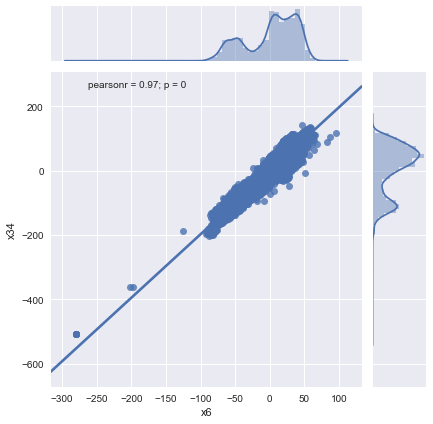

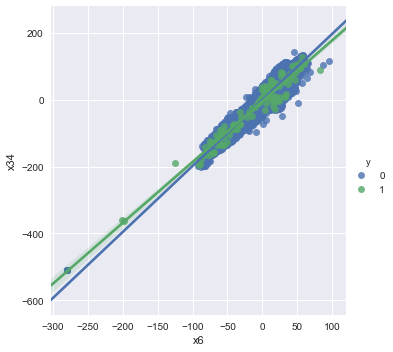

In [7]:
## x6&x34
data1 = df_1[['x6','x34','y']]
plot1_1 = sns.jointplot(x='x6',y='x34',data=df_1, kind='reg')
plot1_2 = sns.lmplot(x='x6',y='x34', hue='y',data=data1)

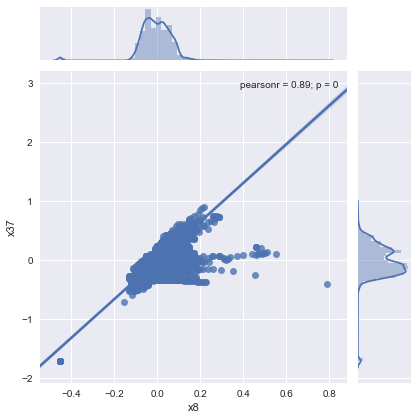

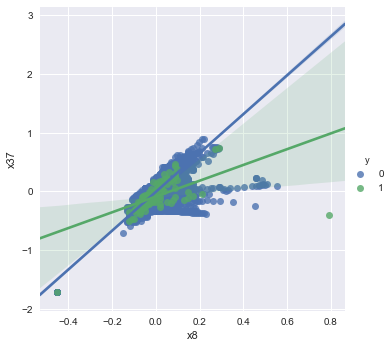

In [8]:
## x8&x37
sns.set(color_codes=True)
data2 = df_1[['x8','x37','y']]
plot2_1 = sns.jointplot(x='x8',y='x37',data=df_1, kind='reg')
plot2_2 = sns.lmplot(x='x8',y='x37', hue='y',data=data2)

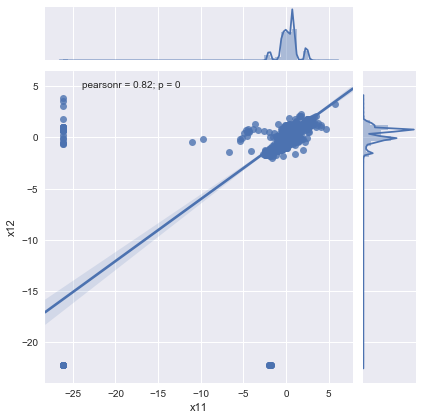

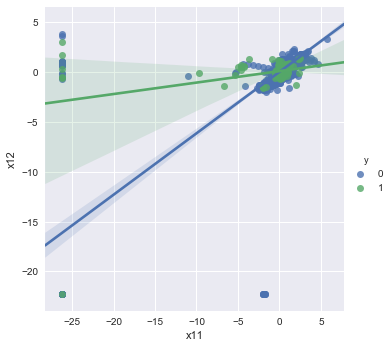

In [9]:
## x11&x12
sns.set(color_codes=True)
data3 = df_1[['x11','x12','y']]
plot3_1 = sns.jointplot(x='x11',y='x12',data=df_1, kind='reg')
plot3_2 = sns.lmplot(x='x11',y='x12', hue='y',data=data3)

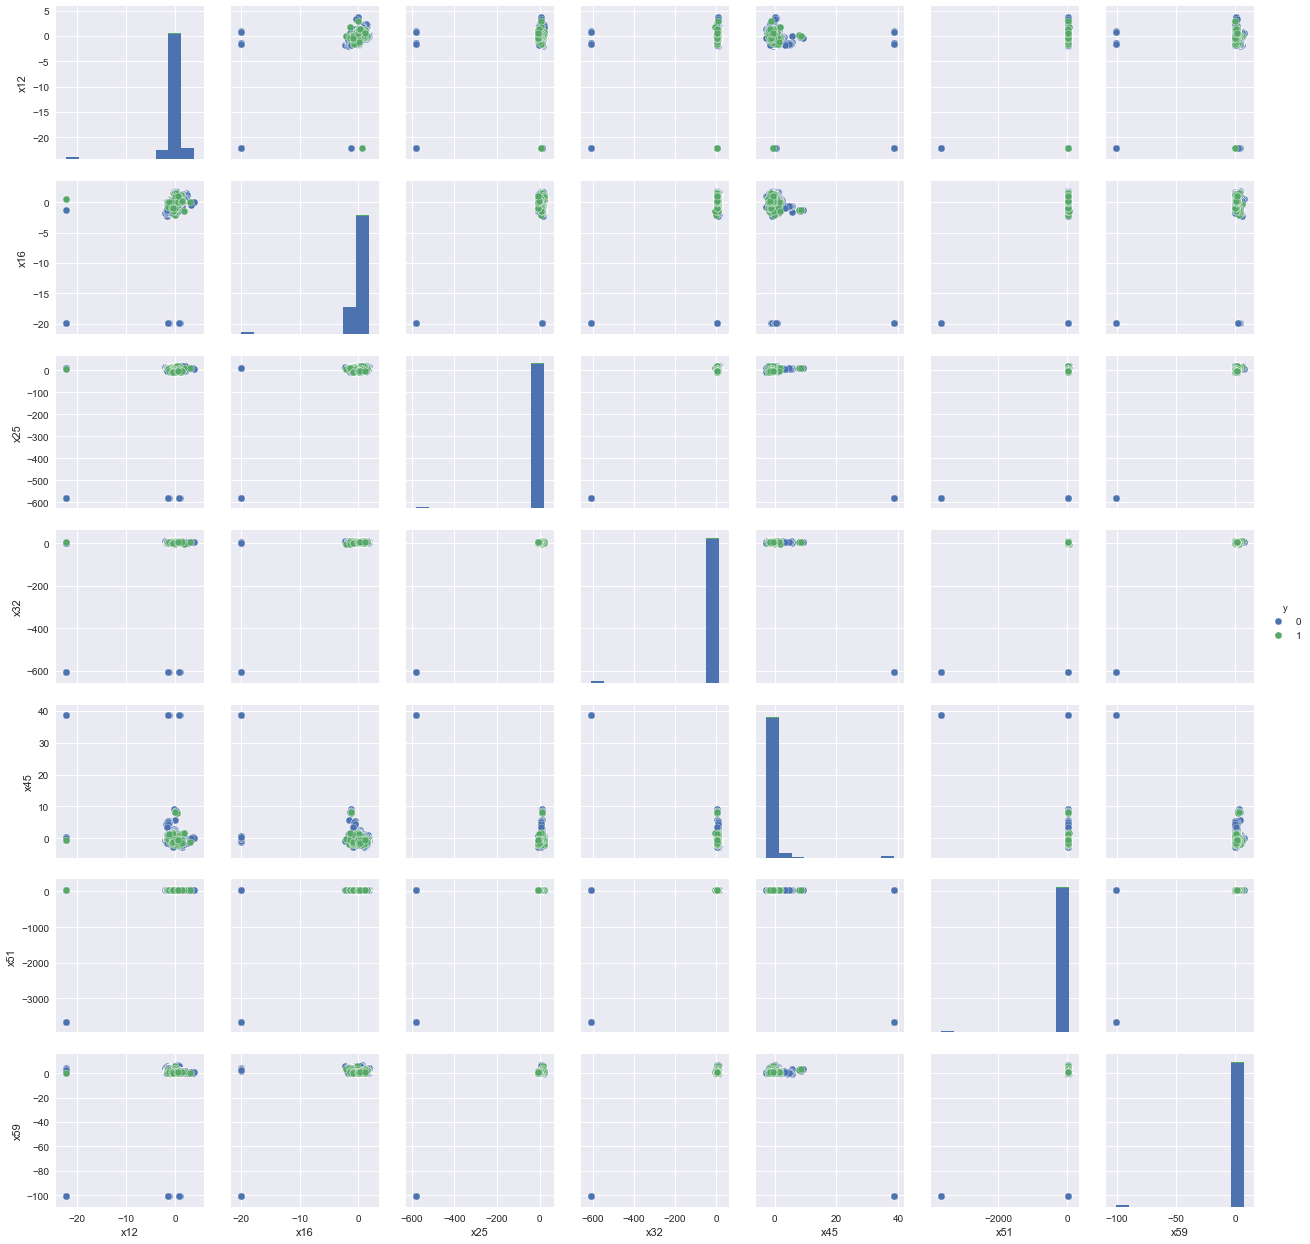

In [10]:
##12，16，25，32，45，51，59
#data3=df_1[['x12','x16','x25','x32','x45','x51','x59','y']]
plot3=sns.pairplot(df_1, vars=['x12','x16','x25','x32','x45','x51','x59'],hue='y')

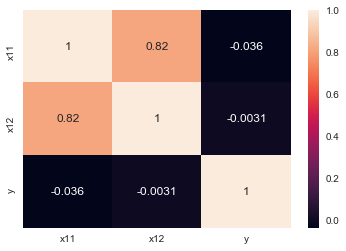

In [11]:
corr3 = data3.corr()
cmap3 = sns.heatmap(corr3, annot=True)

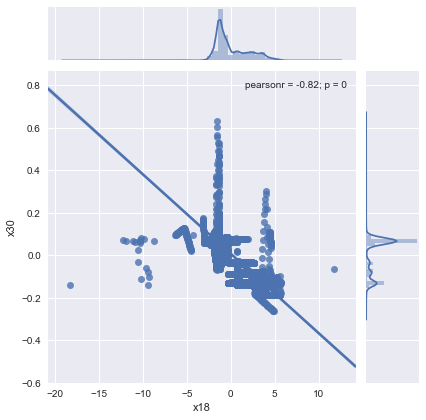

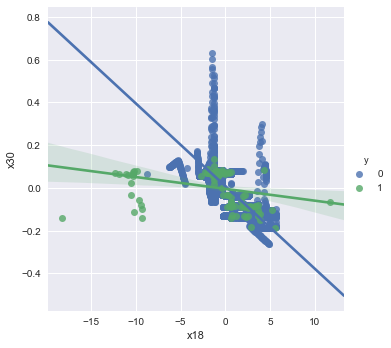

In [12]:
## x18&x30
sns.set(color_codes=True)
data4 = df_1[['x18','x30','y']]
plot4_1 = sns.jointplot(x='x18',y='x30',data=df_1, kind='reg')
plot4_2 = sns.lmplot(x='x18',y='x30', hue='y',data=data4)

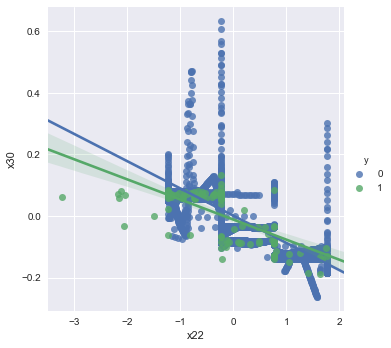

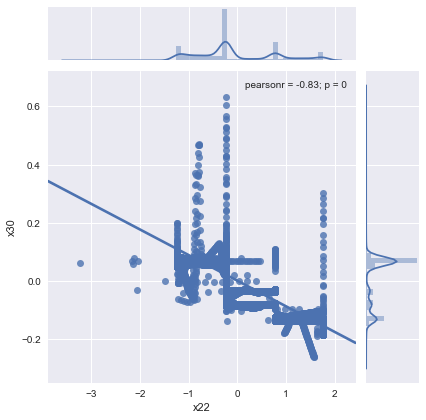

In [13]:
## x22&x30
data5 = df_1[['x22','x30','y']]
plot5_1 = sns.lmplot(x='x22',y='x30', hue='y',data=df_1)
plot5_2 = sns.jointplot(x='x22',y='x30',data=df_1, kind='reg')

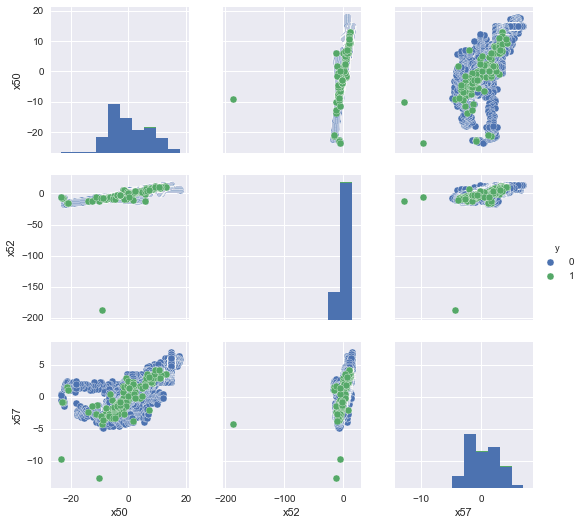

In [14]:
##50,52,57
plot3=sns.pairplot(df_1, vars=['x50','x52','x57'],hue='y')

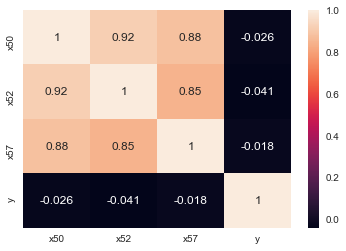

In [16]:
data5=df_1[['x50','x52','x57','y']]
corr5 = data5.corr()
cmap5 = sns.heatmap(corr5, annot=True)

/Users/QCathy/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: could not convert string to float: '5/9/99 9:58'

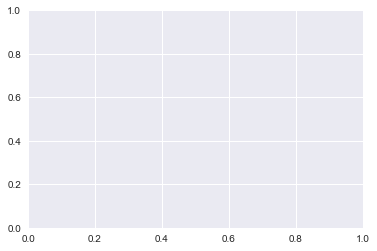

In [23]:
data5_1 = df[['time','x50','x52','x57','y']]
ax5 = sns.tsplot(time = 'time', value='x50',unit='x52',codition='y', data = data5_1)

In [22]:
data5_1.head()

,time,x50,x52,x57,y
0,5/1/99 0:00,11.295155,10.091721,3.473400,0
1,5/1/99 0:02,11.290761,10.095871,2.682933,0
2,5/1/99 0:04,11.286366,10.100265,3.537487,0
3,5/1/99 0:06,11.281972,10.104660,3.986095,0
4,5/1/99 0:08,11.277577,10.109054,3.601573,0
